# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [7]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
import sklearn
from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [9]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [15]:
# Convert categorical features to category type

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [18]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [20]:
# Extract the hour and day of week from the 'created_at' timestamp

# Extract hour
df['created_hour'] = df['created_at'].dt.hour

# Extract day of week (Monday=0, Sunday=6)
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Extract Month
df['created_month'] = df['created_at'].dt.month

df['created_hour'] = df['created_hour'].astype('category')
df['created_dayofweek'] = df['created_dayofweek'].astype('category')
df['isWeekend'] = df['isWeekend'].astype('category')
df['created_month'] = df['created_month'].astype('category')

In [21]:
# Drop unnecessary columns
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [24]:
# Define target variable (y) and features (X)

# Target variable
y = df['time_taken']

# Features
X = df.drop(columns=['time_taken'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [26]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [29]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [30]:
print("Categorical Columns: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)


Categorical Columns:  ['market_id', 'store_primary_category', 'order_protocol', 'created_hour', 'created_dayofweek', 'isWeekend', 'created_month']
Numerical Columns:  ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

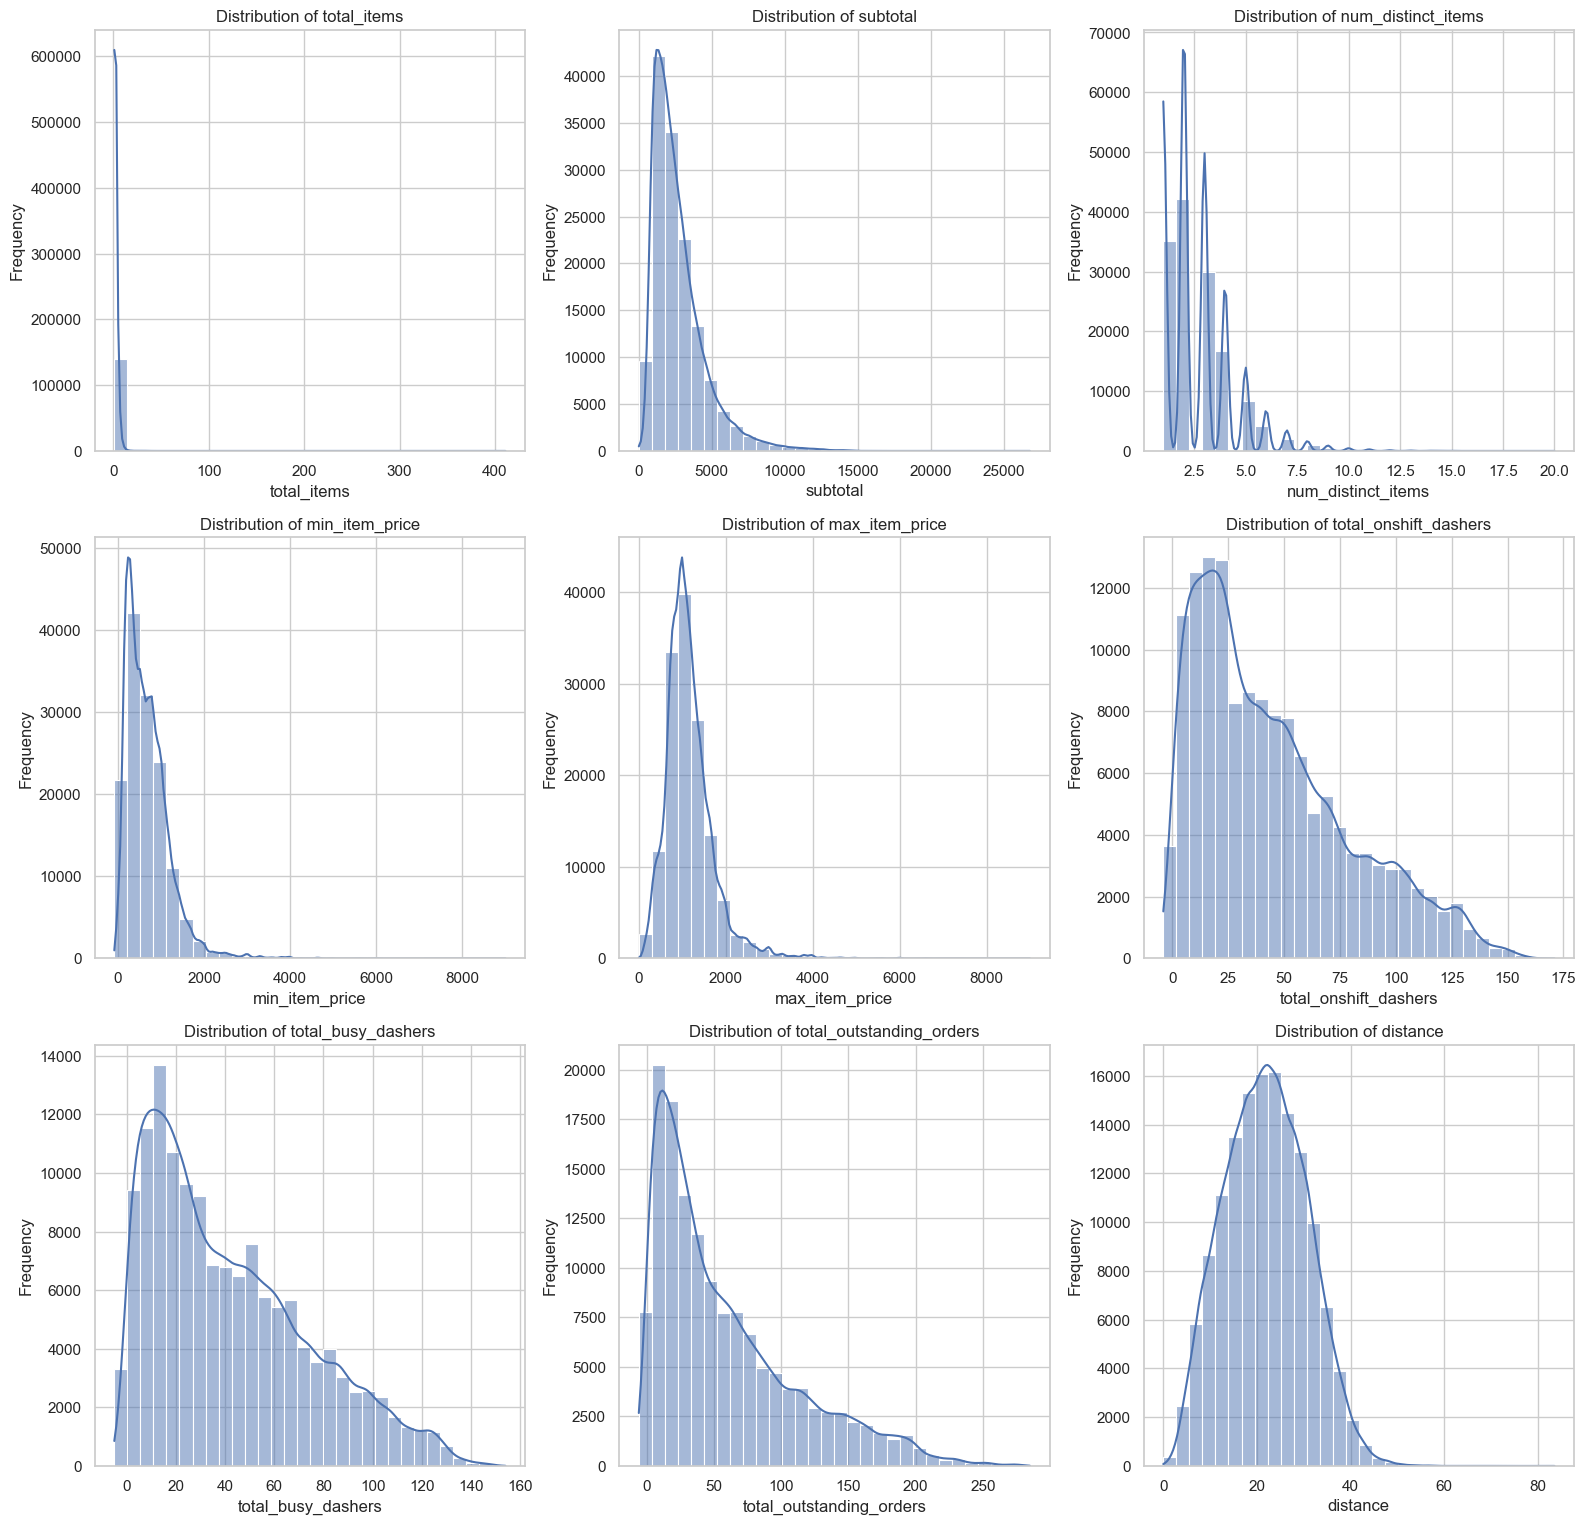

In [32]:
# Plot distributions for all numerical columns

sns.set(style='whitegrid')

plt.figure(figsize=(16, 20))

# Loop through all numerical columns
for idx, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, idx + 1)  # 3 plots per row
    sns.histplot(data=X_train, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [34]:
# Distribution of categorical columns

plt.figure(figsize=(16, 20))

for idx, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, idx + 1)
    sns.countplot(data=X_train, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

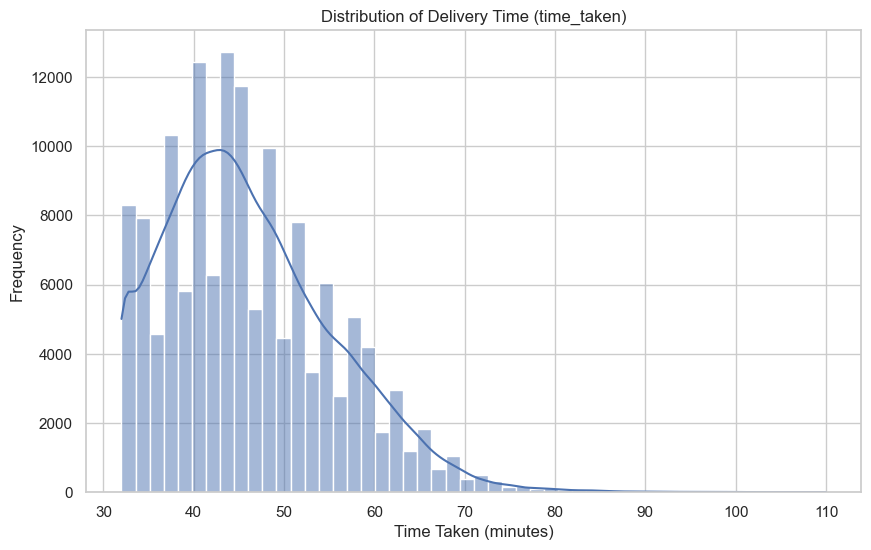

In [36]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=50)
plt.title('Distribution of Delivery Time (time_taken)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [39]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(16, 25))

for idx, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, idx + 1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)  # alpha for transparency
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken')

plt.tight_layout()
plt.show()

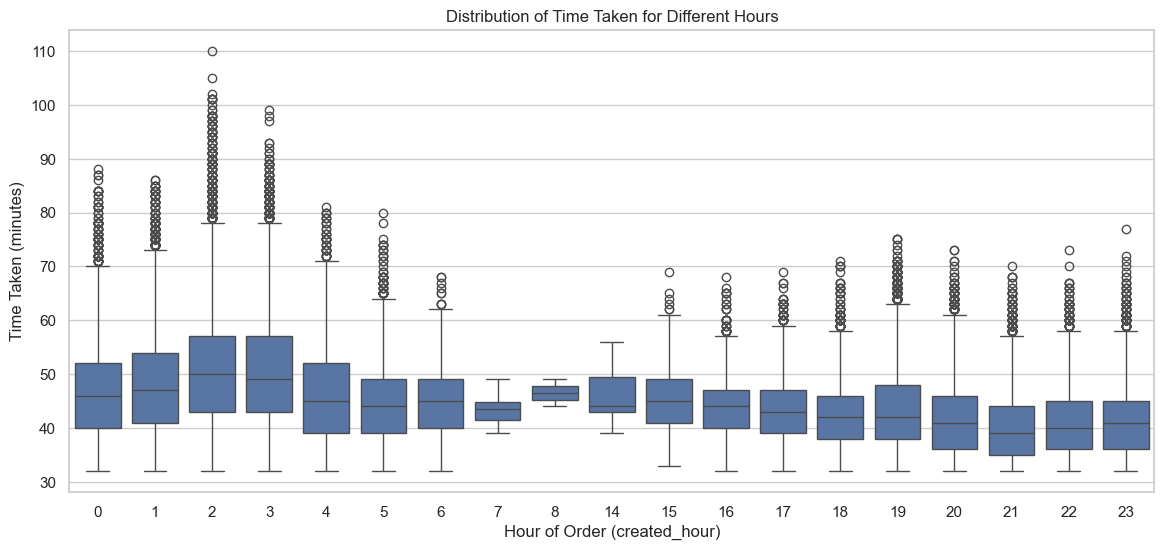

In [40]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14, 6))
sns.boxplot(x=X_train['created_hour'], y=y_train)
plt.title('Distribution of Time Taken for Different Hours')
plt.xlabel('Hour of Order (created_hour)')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=0)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

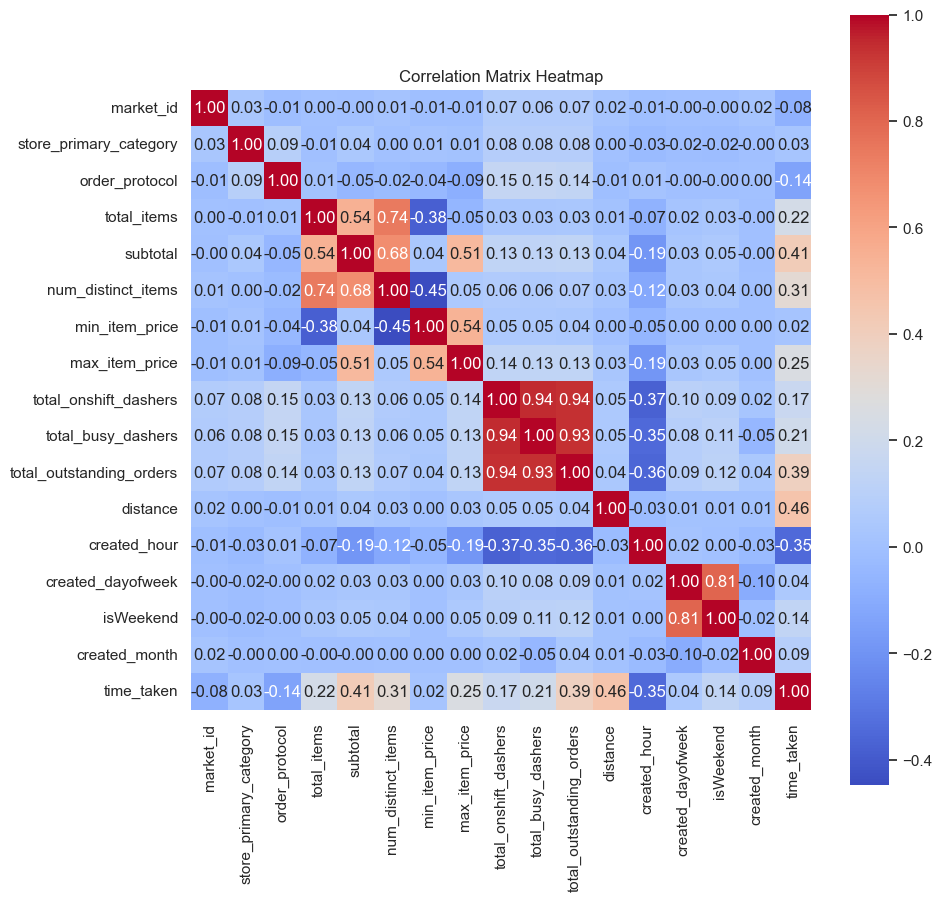

In [43]:
# Plot the heatmap of the correlation matrix

# Create combined dataset temporarily
train_data = X_train.copy()
train_data['time_taken'] = y_train

# Compute correlation matrix
corr_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Delete the temporary train_data to save memory
del train_data

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [45]:
# Drop 3-5 weakly correlated columns from training dataset

# store_primary_category +0.03 — weak
# created_dayofweek	     +0.04 — weak
# min_item_price	     +0.02 — weak
# market_id	             -0.08 — weak
# created_month	         +0.09 — weak
drop_cols = ['store_primary_category', 'created_dayofweek', 'min_item_price', 'market_id', 'created_month']

X_train = X_train.drop(columns=drop_cols)

categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

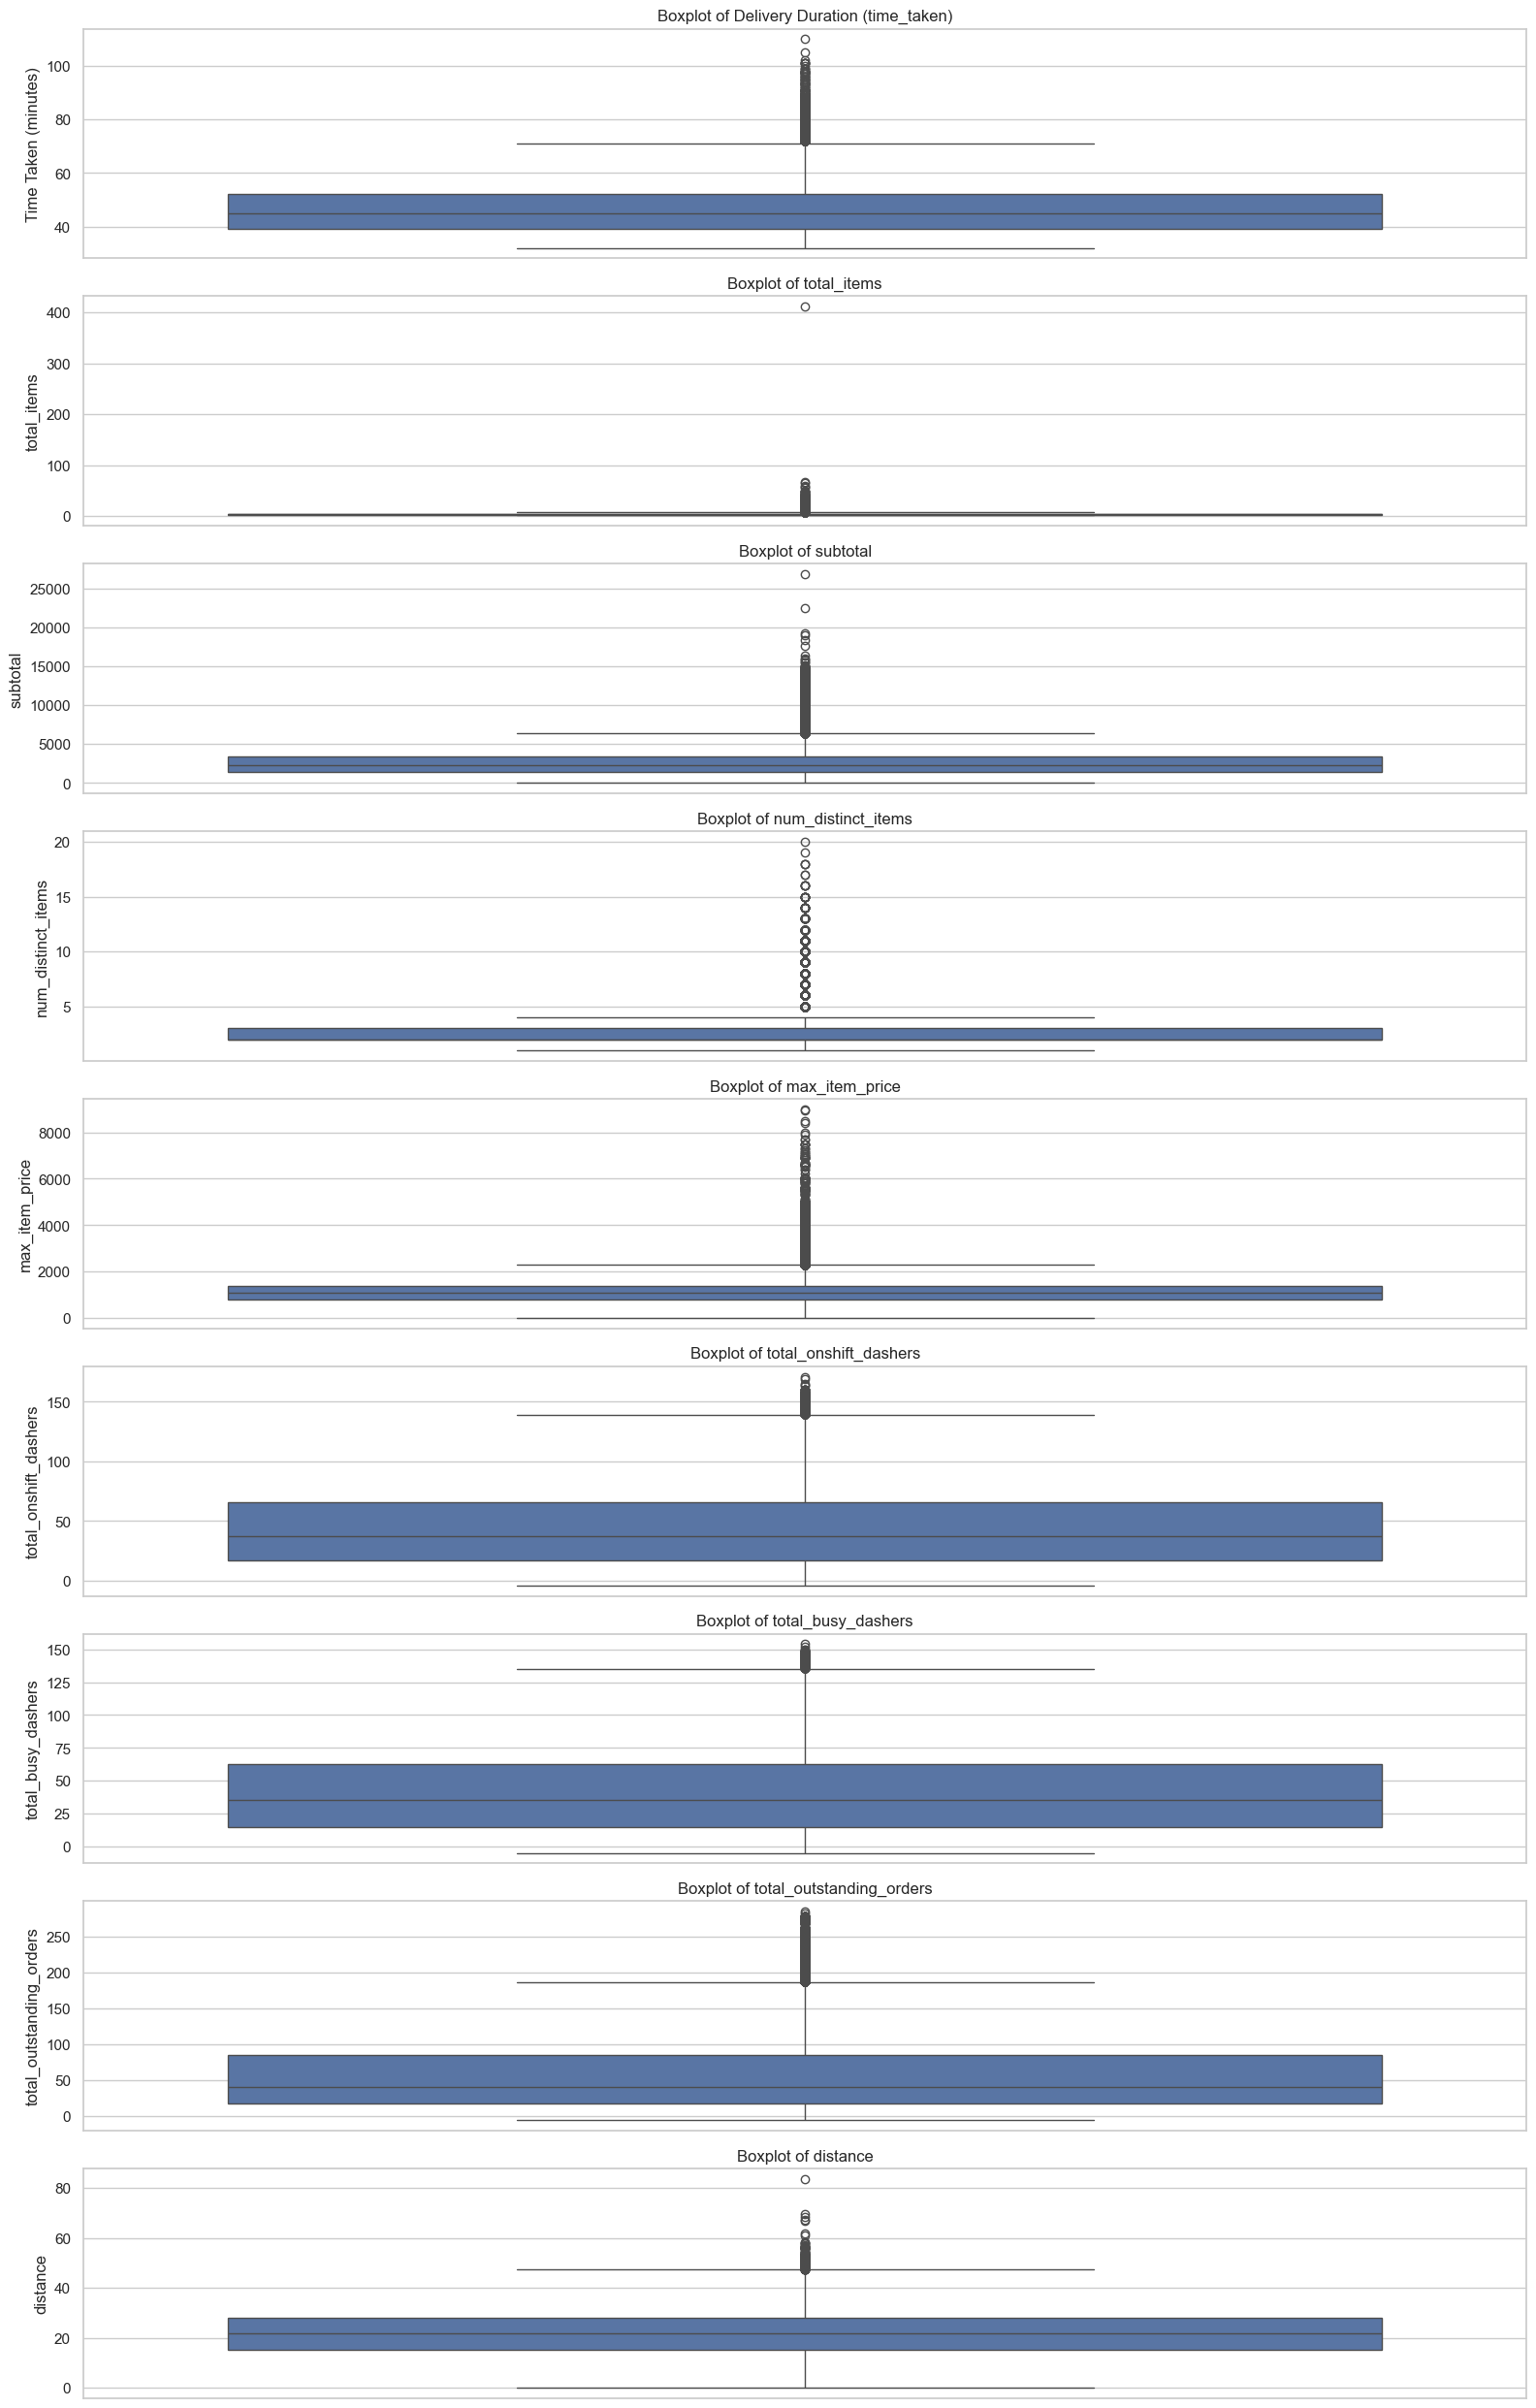

In [48]:
# Boxplot for time_taken

plt.figure(figsize=(16, 25))

plt.subplot(len(numerical_cols) + 1, 1, 1)
sns.boxplot(y=y_train)
plt.title('Boxplot of Delivery Duration (time_taken)')
plt.ylabel('Time Taken (minutes)')

for idx, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) + 1, 1, idx + 2)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [50]:
# Handle outliers

# since above box plot shows most having outliers beyond IQR and not below, one way can be is to not 
# delete data and just have the extreme values to point to 99 percentile this way we can have a more detailed analysis
def cap_upper_outliers(df, col):
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper, upper, df[col])

# Apply to features
for col in numerical_cols:
    cap_upper_outliers(X_train, col)

# Also for target variable
upper_target = np.quantile(y_train, 0.99)
y_train = np.where(y_train > upper_target, upper_target, y_train)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [52]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_cols_test = X_test.select_dtypes(include=['category']).columns.tolist()
numerical_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [55]:
# Plot distributions for all numerical columns

sns.set(style='whitegrid')

plt.figure(figsize=(16, 20))

# Loop through all numerical columns
for idx, col in enumerate(numerical_cols_test):
    plt.subplot(len(numerical_cols_test) // 3 + 1, 3, idx + 1)  # 3 plots per row
    sns.histplot(data=X_test, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

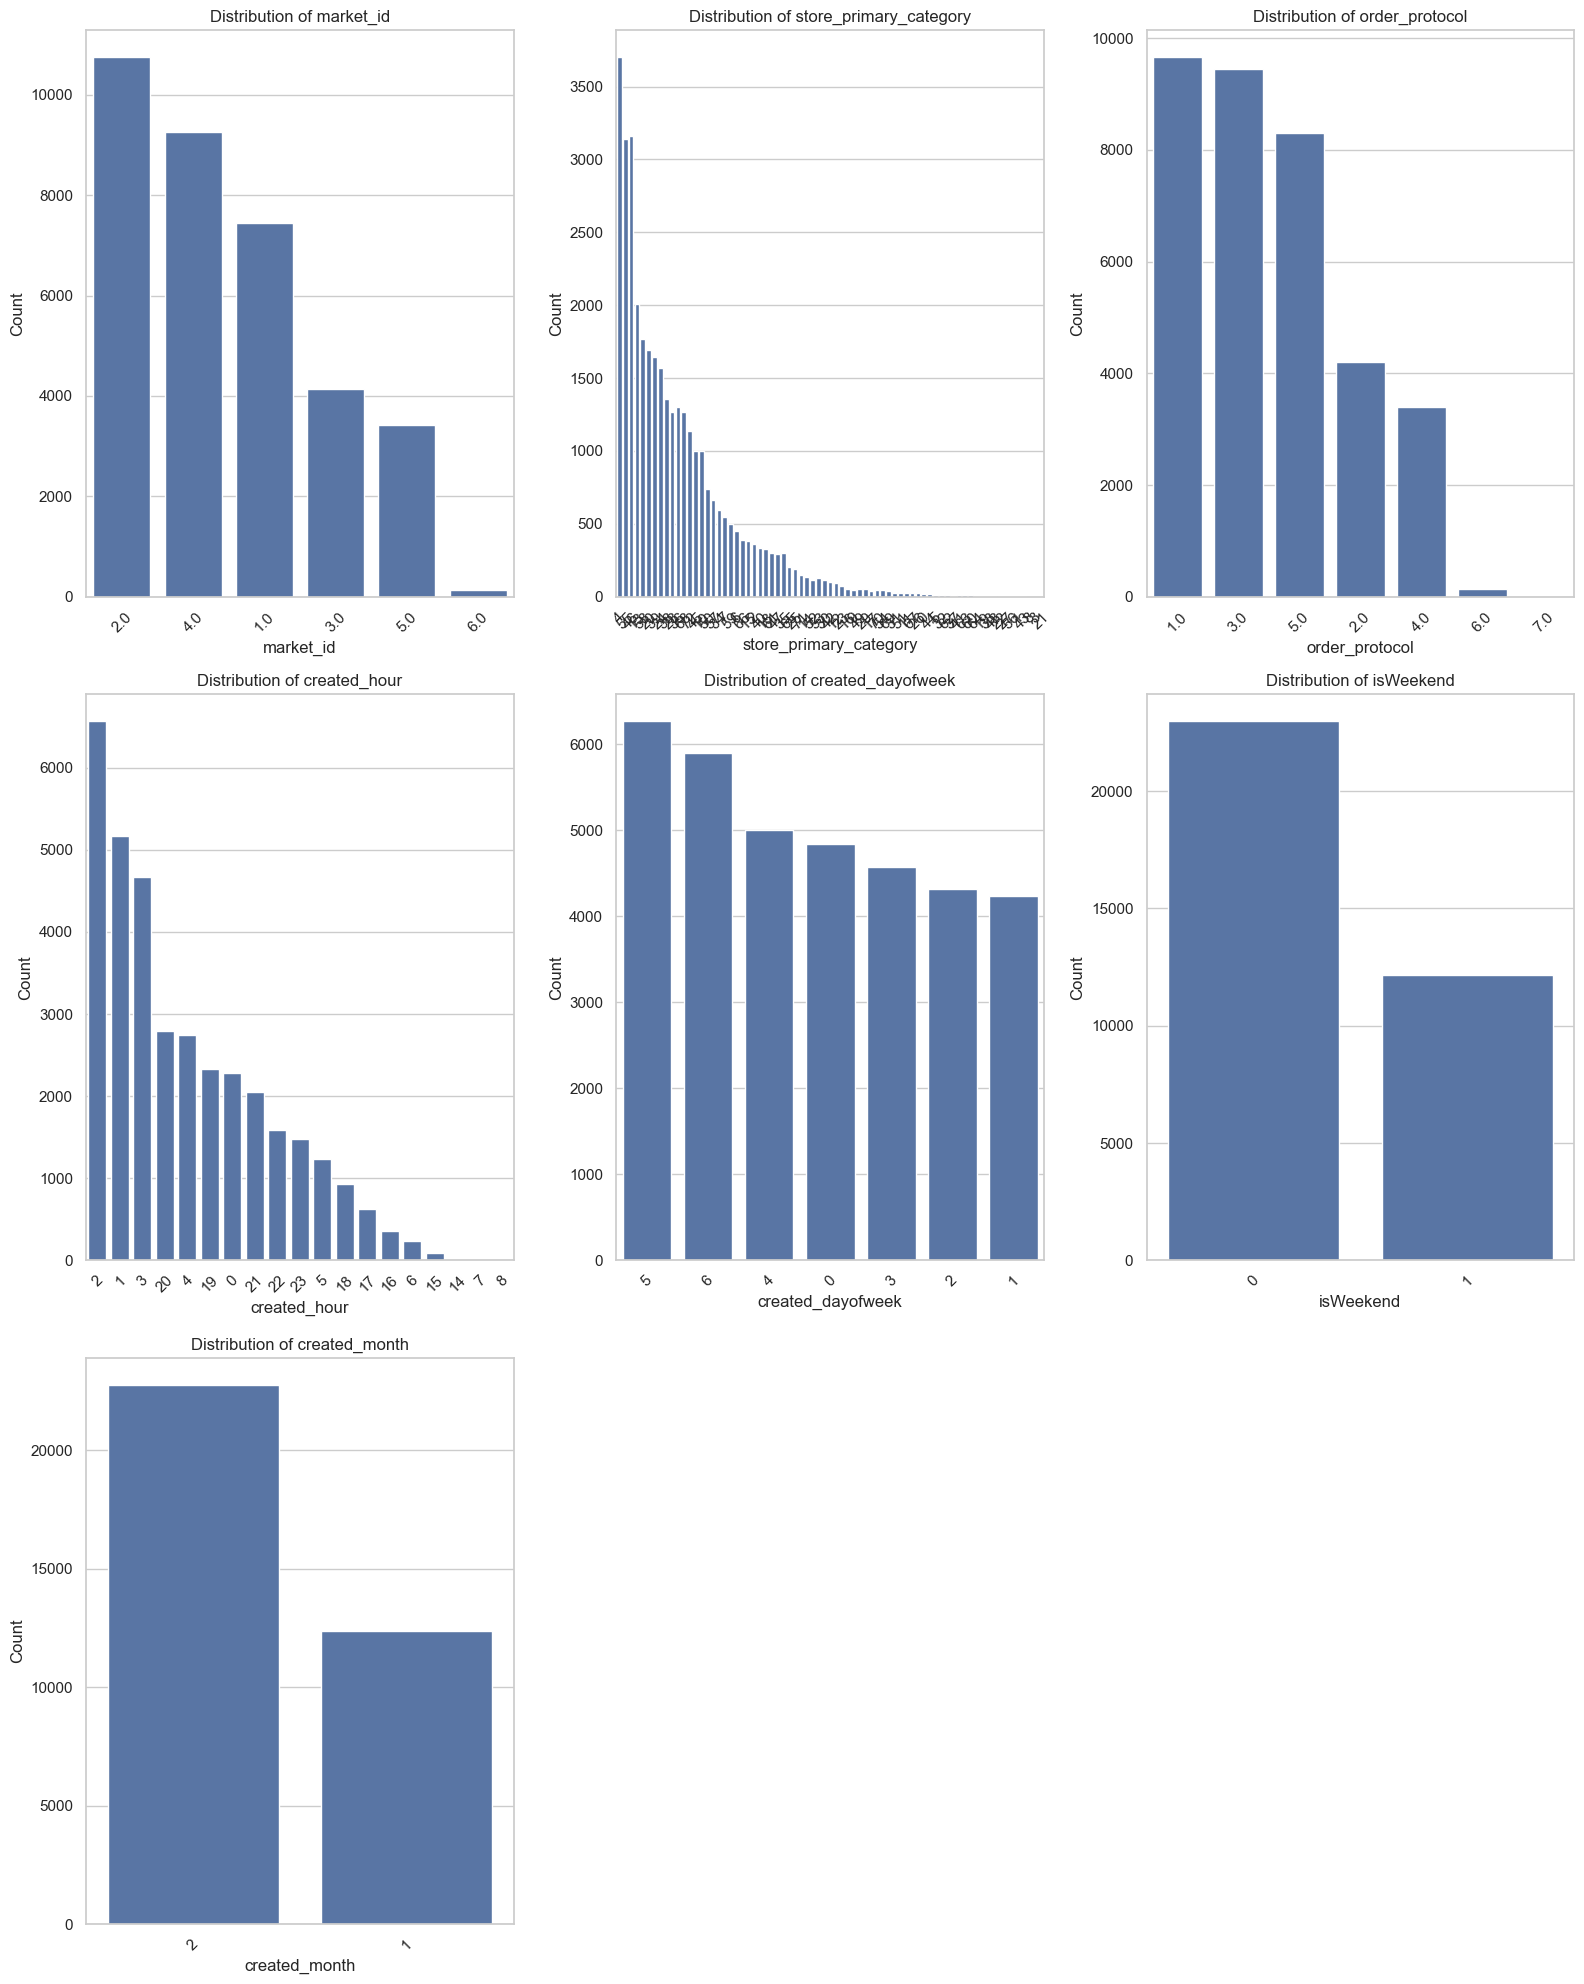

In [57]:
# Distribution of categorical columns

plt.figure(figsize=(16, 20))

for idx, col in enumerate(categorical_cols_test):
    plt.subplot(len(categorical_cols_test) // 3 + 1, 3, idx + 1)
    sns.countplot(data=X_test, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

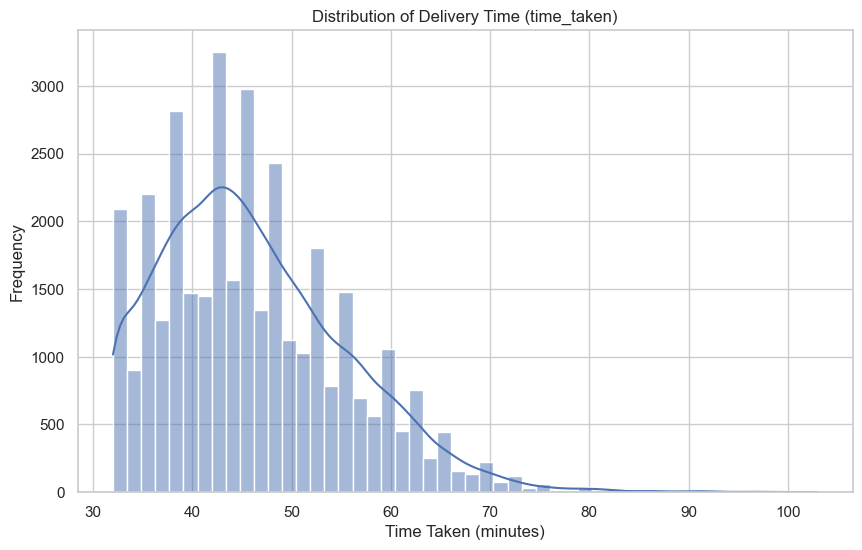

In [59]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True, bins=50)
plt.title('Distribution of Delivery Time (time_taken)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

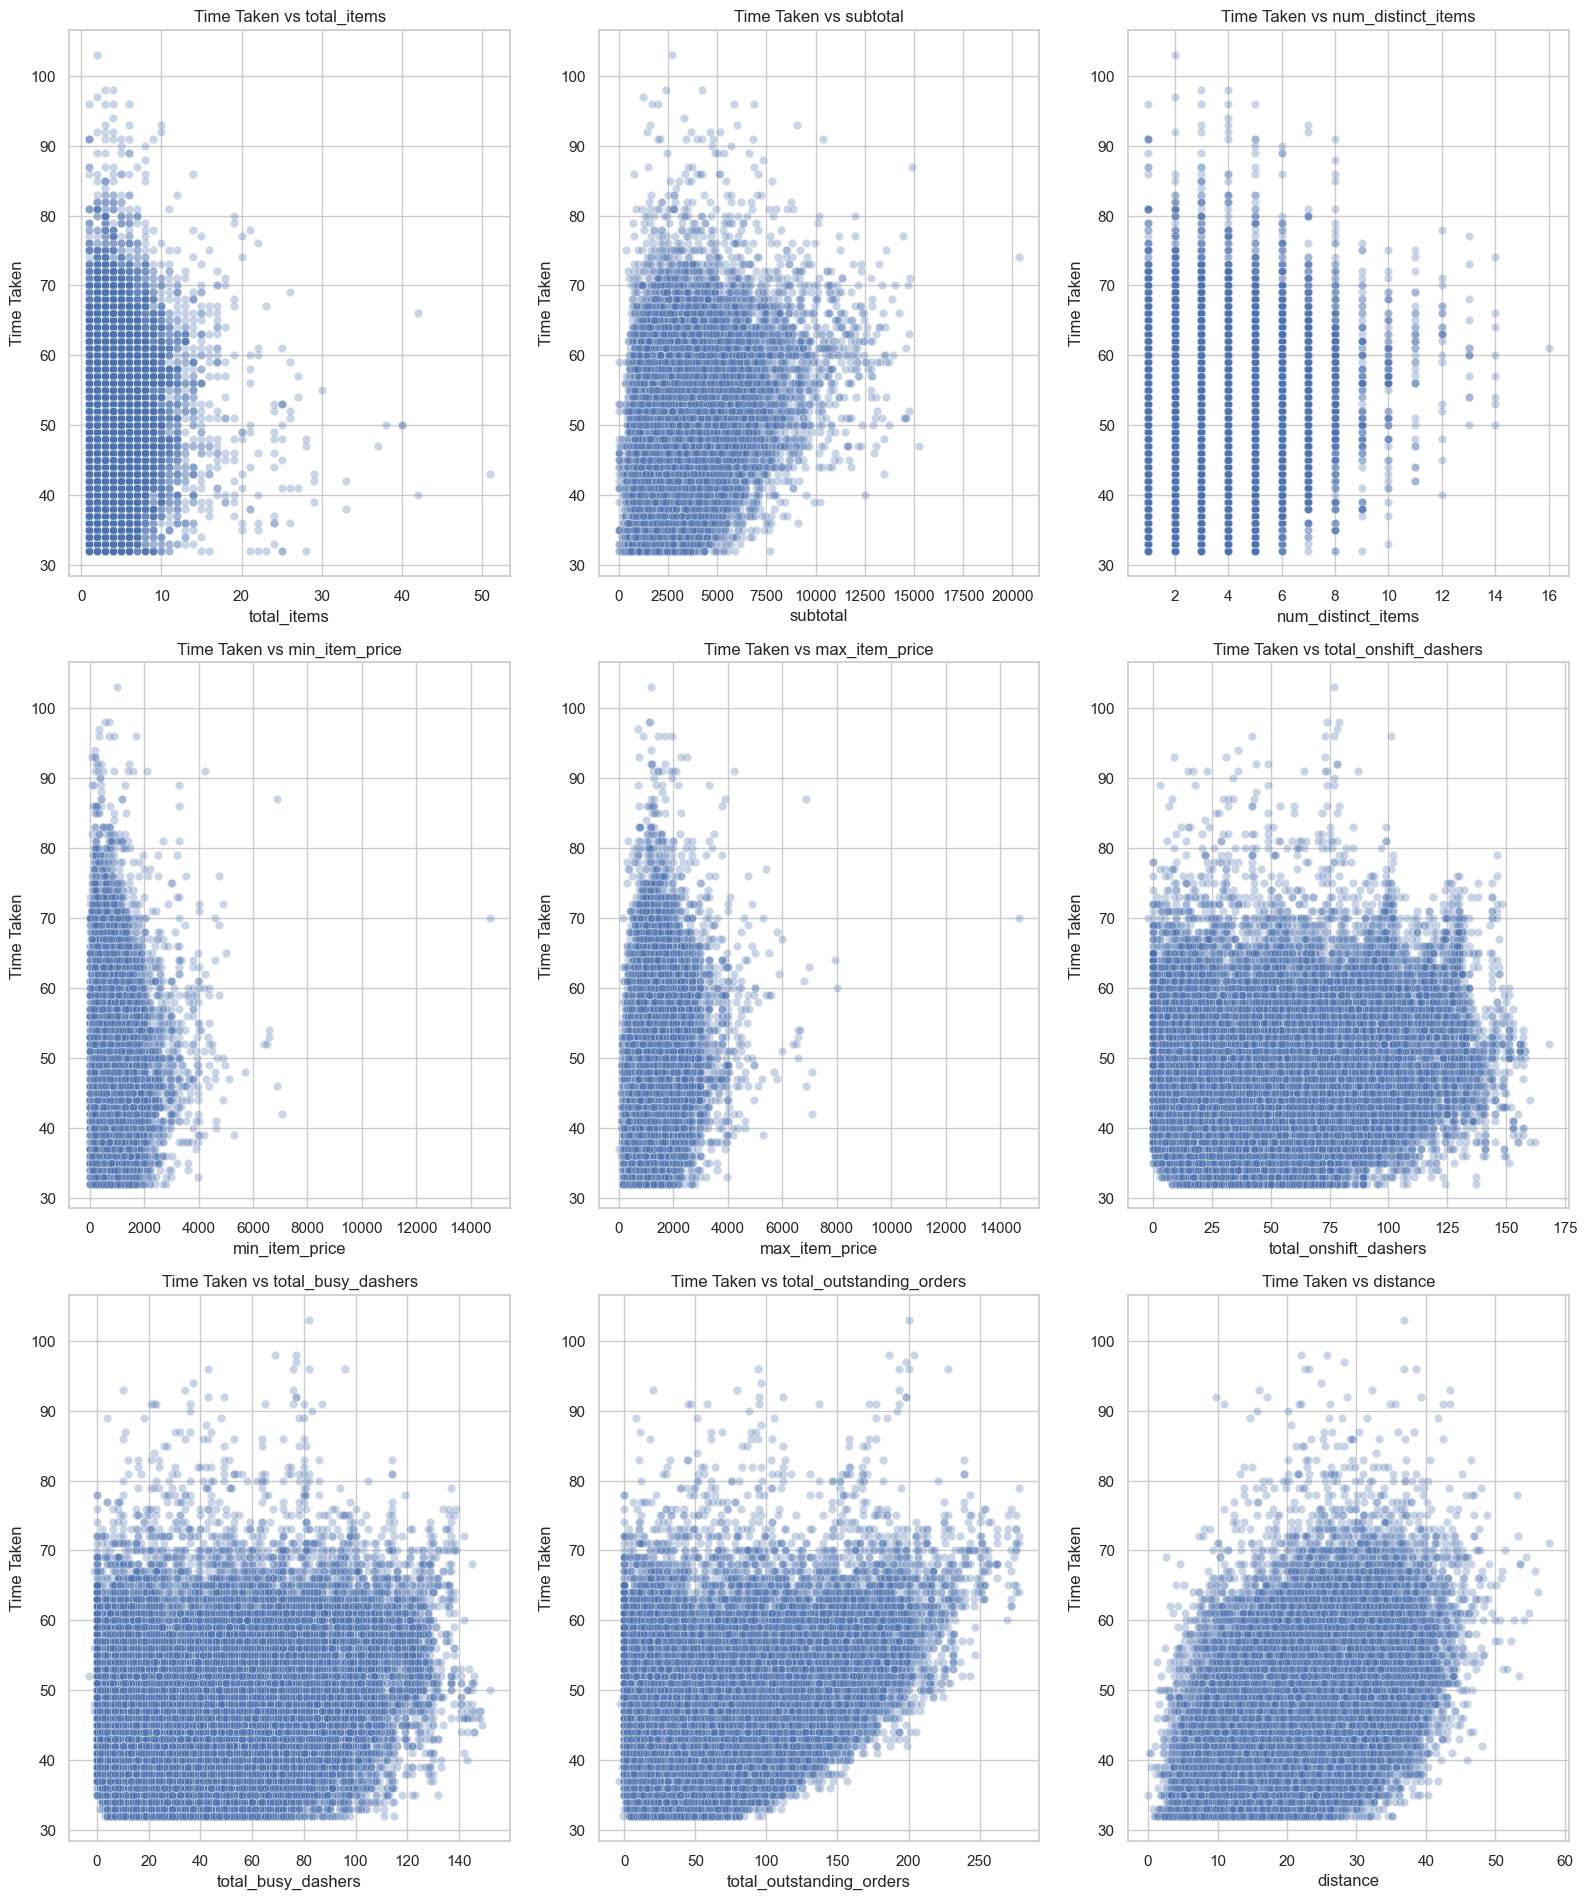

In [61]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(16, 25))

for idx, col in enumerate(numerical_cols_test):
    plt.subplot(len(numerical_cols_test) // 3 + 1, 3, idx + 1)
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.3)  # alpha for transparency
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [63]:
# Drop the weakly correlated columns from training dataset

X_test = X_test.drop(columns=drop_cols)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [66]:
# Import libraries

from sklearn.preprocessing import MinMaxScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [68]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])

X_test_scaled = X_test.copy()
numerical_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_test_scaled[numerical_cols_test] = scaler.transform(X_test_scaled[numerical_cols_test])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [72]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [73]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
# Make predictions
y_pred = model.predict(X_train_scaled)

In [75]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)


In [76]:
print("mae", mae, "mse", mse, "rmse", rmse, "r2", r2)

mae 2.3417087749635863 mse 10.207018755857412 rmse 3.1948425244223557 r2 0.8769993934359334


In [77]:

plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Perfect prediction line
plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [81]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE

# Store results
feature_counts = []
r2_scores = []
rmse_scores = []
selected_feature_sets = []

total_features = X_train_scaled.shape[1]

for n_features in range(total_features, 0, -1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)
    
    X_train_rfe = selector.transform(X_train_scaled)
    
    model = LinearRegression()
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_train_rfe)
    
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    
    feature_counts.append(n_features)
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    # append the selectors so we can create the best model
    selected_feature_sets.append(selector.support_)

# Plot R² and RMSE
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(feature_counts, r2_scores, marker='o')
plt.title('R² Score vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.gca().invert_xaxis()  # Higher feature count on left

plt.subplot(1,2,2)
plt.plot(feature_counts, rmse_scores, marker='o', color='orange')
plt.title('RMSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


In [82]:
# Build the final model with selected number of features

# Find the index of feature where index == 8 as model is best with 8 features
index_8_features = feature_counts.index(8)
# get the index
final_selected = selected_feature_sets[index_8_features]

selected_features = X_train_scaled.columns[final_selected]

X_train_final = X_train_scaled[selected_features]
X_test_final = X_test_scaled[selected_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

y_train_pred = final_model.predict(X_train_final)

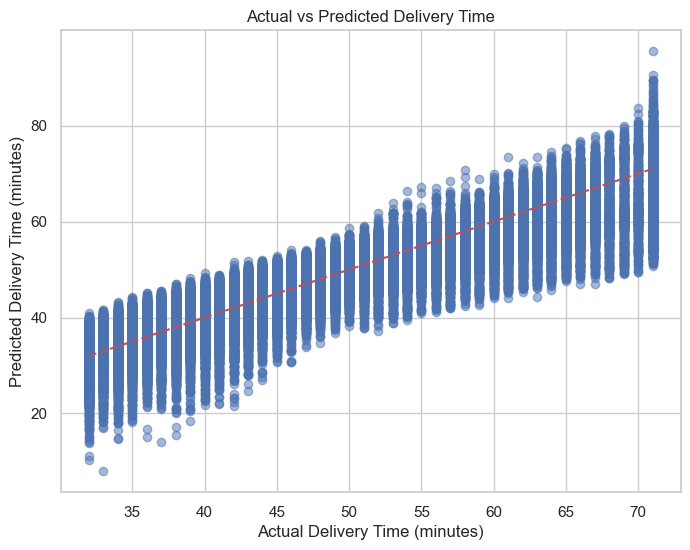

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Perfect prediction line
plt.show()

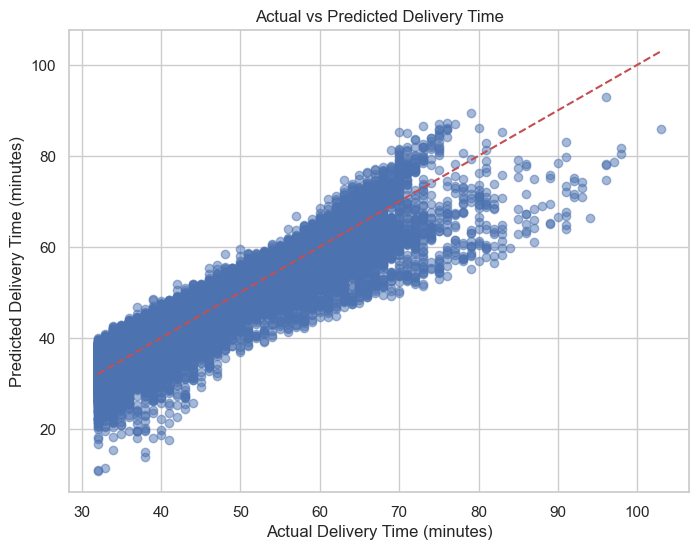

In [84]:
y_test_pred = final_model.predict(X_test_final)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()

In [85]:
import statsmodels.api as sm

# Add a constant term to the final selected training data
X_train_final_const = sm.add_constant(X_train_final)

# Build and fit the OLS model
stats_model = sm.OLS(y_train, X_train_final_const)
stats_results = stats_model.fit()

# Display the full summary
print(stats_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 7.914e+04
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:43:47   Log-Likelihood:            -3.9031e+05
No. Observations:              140621   AIC:                         7.806e+05
Df Residuals:                  140612   BIC:                         7.807e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

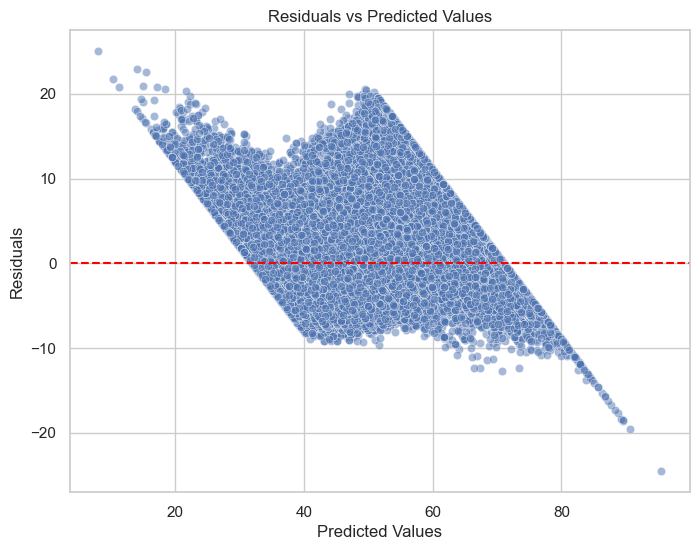

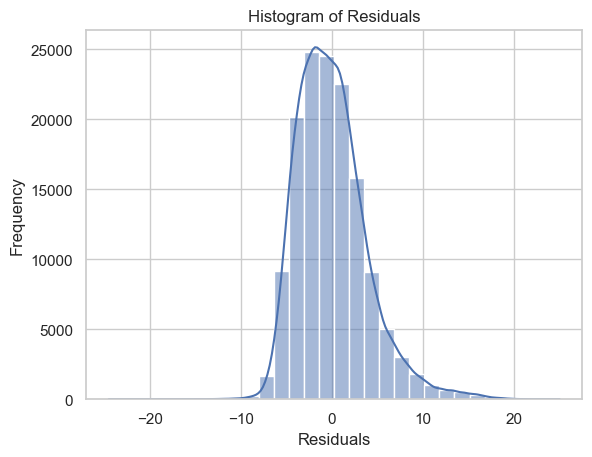

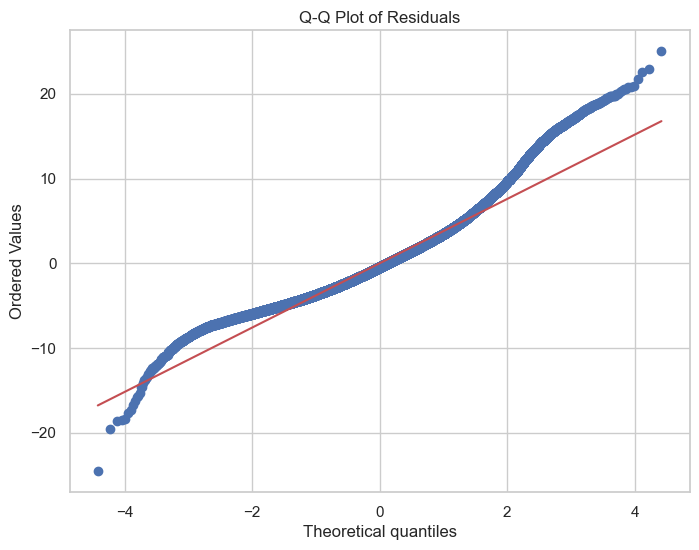

In [88]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Residuals = Actual - Predicted
residuals = y_train - y_train_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

[Your inferences here:]
## 1. Histogram of Residuals
- The histogram is reasonably **symmetric** and centered around **zero**.
- There is a **slight positive skew** (longer tail towards positive residuals).
- The peak suggests that most residuals are concentrated near 0.

**Inference:**  
- ✅ Most errors are small and centered around zero, indicating good model performance.

## 2. Residuals vs Predicted Values (Scatter Plot)
- The residuals show a **V-shaped pattern** rather than random scatter.
- Here, residuals widen as predicted values move away from the center.

**Inference:**  
- Model performance varies across the range of predicted values, being less stable for very low or very high deliveries.

## 3. Q-Q Plot of Residuals
- The Q-Q plot shows that residuals mostly follow the theoretical line in the center region.
- The ends of the plot **deviate from the line**, especially at extreme quantiles

**Inference:**  
- **Residuals are not perfectly normally distributed**.

# Overall Conclusion
- The model shows **good predictive ability** for most cases.
- However: **Outliers** slightly affect the model assumptions.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [92]:
# Compare the scaled vs unscaled features used in the final model

numerical_selected_features = selected_features.intersection(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Range from unscaled X_train
feature_min = X_train[numerical_selected_features].min()
feature_max = X_train[numerical_selected_features].max()
feature_range = feature_max - feature_min

# Build coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': numerical_selected_features,
    'Scaled Coefficient': final_model.coef_[:len(numerical_selected_features)]
})

# Calculate Unscaled Coefficient
coef_df['Unscaled Coefficient'] = coef_df['Scaled Coefficient'] / feature_range.values
coef_df

Feature  Scaled Coefficient  Unscaled Coefficient
0                  subtotal           12.879338              0.001356
1        num_distinct_items            4.032428              0.576061
2            max_item_price            4.327676              0.001396
3     total_onshift_dashers          -49.148841             -0.351063
4        total_busy_dashers          -19.455532             -0.148516
5  total_outstanding_orders           77.918676              0.355793
6                  distance           19.874210              0.475005

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [94]:
# Analyze the effect of a unit change in a feature, say 'total_items'

feature_to_analyze = 'distance'

feature_min_value = X_train[feature_to_analyze].min()
feature_max_value = X_train[feature_to_analyze].max()
feature_range_value = feature_max_value - feature_min_value

scaled_coef = coef_df[coef_df['Feature'] == feature_to_analyze]['Scaled Coefficient'].values[0]
unscaled_coef = coef_df[coef_df['Feature'] == feature_to_analyze]['Unscaled Coefficient'].values[0]

effect_on_target_per_unit = scaled_coef * (1 / feature_range_value)

print("Effect on Delivery Time for +1 unit increase in" ,feature_to_analyze, "= ", effect_on_target_per_unit)

Effect on Delivery Time for +1 unit increase in distance =  0.47500502110752735


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

## Are there any categorical variables in the data?  
## What is their effect on the dependent variable?

- Yes, there are categorical variables in the dataset.  
  Some of the important categorical columns include:
  - `market_id`
  - `store_primary_category`
  - `order_protocol`
  - `created_hour`
  - `created_dayofweek`
  - `created_month`
  - `isWeekend`

- Based on the correlation heatmaps:
  - Most categorical variables show **very low correlation** with the dependent variable (`time_taken`).
  - For example:
    - `isWeekend` has a correlation of **0.14** with `time_taken`.
    - `created_hour` has a correlation of **-0.35** with `time_taken`.
    - Other categorical columns like `market_id`, `store_primary_category`, and `order_protocol` have **almost zero** correlation with `time_taken`.

- After applying feature selection using **Recursive Feature Elimination (RFE)**:
  - Among all categorical variables, **only `isWeekend`** was selected in the final linear model along with seven numerical variables.
  - This indicates that while most categorical features have little effect, **`isWeekend` has a slight but meaningful impact** on delivery time.

- **Interpretation**:
  - Since `isWeekend` was included in the final model, it suggests that whether the delivery happens on a weekend has some **positive influence** on the time taken for delivery.
  - The coefficient for `isWeekend` is **1.2123**, meaning that:
    - If an order is placed on a weekend (`isWeekend = 1`), the delivery time is expected to **increase by approximately 1.21 minutes** compared to a non-weekend delivery, keeping all other features constant.


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

- The parameter `test_size = 0.2` in `train_test_split` indicates that **20% of the dataset** will be **reserved for testing**, and the remaining **80% will be used for training** the model.

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

The target variable is time_taken.

From the correlation matrix heatmap:

* Among all the features, **distance** shows the highest **positive correlation** with time_taken, having a correlation coefficient of **0.46** .
* This means that as the distance increases, the delivery time (time_taken) tends to increase as well.
* Thus, distance is the feature most strongly correlated with the target variable.

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

### What was your approach to detect the outliers? How did you address them?

**Outlier Detection Approach:**
- **Boxplots** were created for each numerical feature to visually identify the presence of outliers.
- In the boxplots, it was observed that most of the outliers were on the **higher end (above the 75th percentile)**.
- Also noticed that lower-end outliers (below 25th percentile) were relatively fewer and less impactful.

**Outlier Handling Approach:**
- Instead of removing the outliers, used a **capping** technique:
  - For features with extreme values, values above the **99th percentile** were capped at the **99th percentile value**.
  - Did **not clip at the 1st percentile**, since the major issue was only with high-end outliers. (also lower value is expected)
- This ensured that the extreme values were controlled without losing valuable data points, thereby improving model robustness.

**Summary:**
- **Detection:** Boxplots + understanding of distribution.
- **Handling:** Capped values beyond the 99th percentile to the 99th percentile value.

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

In [113]:
coef_df

Feature  Scaled Coefficient  Unscaled Coefficient
0                  subtotal           12.879338              0.001356
1        num_distinct_items            4.032428              0.576061
2            max_item_price            4.327676              0.001396
3     total_onshift_dashers          -49.148841             -0.351063
4        total_busy_dashers          -19.455532             -0.148516
5  total_outstanding_orders           77.918676              0.355793
6                  distance           19.874210              0.475005

**Answer:**

### Based on the final model, which are the top 3 features significantly affecting the delivery time?

From the unscaled coefficients:

- **num_distinct_items** (Unscaled Coefficient ≈ 0.576)
  - More distinct items in the order slightly increase delivery time, likely due to preparation complexity.
  
- **distance** (Unscaled Coefficient ≈ 0.475)
  - As the distance between the restaurant and customer increases, delivery time increases.
  
- **total_outstanding_orders** (Unscaled Coefficient ≈ 0.356)
  - More pending/outstanding orders correlate with longer delivery times.

Additionally:
- **isWeekend** (Unscaled Coefficient ≈ 1.212)
  - Delivery time increases by approximately **1.21 minutes** if the order is placed on a weekend instead of a weekday.

---

> These features have the strongest real-world impact on delivery time according to the model.
> Categorical feature `isWeekend` also shows a significant effect by adding about 1.21 minutes to weekend deliveries.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


### Explain the Linear Regression Algorithm in Detail

**Linear Regression** is a supervised machine learning algorithm used for predicting a **continuous dependent variable** based on one or more independent variables.

---

#### Key Concepts:
- The goal is to find the **best-fitting straight line** (also called a regression line) that minimizes the difference between the **actual** and **predicted** values.
- The relationship between the dependent variable (**y**) and independent variable(s) (**x**) is modeled using a linear equation:

\[
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
\]

Where:
- \( y \) = Predicted/Target variable
- \( \beta_0 \) = Intercept (constant term)
- \( \beta_1, \beta_2, \dots, \beta_n \) = Coefficients (slopes for each feature)
- \( x_1, x_2, \dots, x_n \) = Input/Independent features
- \( \epsilon \) = Error term (residual)

---

#### Working:
1. **Assume** an initial line (random coefficients).
2. **Measure** the difference between actual and predicted values (error).
3. **Adjust** coefficients (\( \beta \)) to minimize the error using methods like **Ordinary Least Squares (OLS)**.
4. **Objective:** Minimize the **Sum of Squared Errors (SSE)**:

\[
SSE = \sum (y_i - \hat{y}_i)^2
\]

---

#### Types of Linear Regression:
- **Simple Linear Regression:** One independent variable.
- **Multiple Linear Regression:** Multiple independent variables.

---

#### Assumptions of Linear Regression:
- **Linearity:** Relationship between X and Y is linear.
- **Independence:** Observations are independent.
- **Homoscedasticity:** Constant variance of residuals across all levels of X.
- **Normality of Errors:** Residuals are normally distributed.
- **No Multicollinearity:** Independent variables are not highly correlated.

---

#### Advantages:
- Easy to interpret.
- Computationally efficient.
- Works well when the relationship is truly linear.

#### Disadvantages:
- Sensitive to outliers.
- Assumes a strict linear relationship.
- Prone to overfitting if too many irrelevant variables are included.

---

> In simple words: Linear Regression draws a straight line to best predict the target value based on the input features, ensuring the overall prediction error is as low as possible.


##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>


| Aspect                        | Simple Linear Regression                          | Multiple Linear Regression                          |
|-------------------------------|----------------------------------------------------|----------------------------------------------------|
| **Definition**                | Predicts the target using **one** independent variable. | Predicts the target using **two or more** independent variables. |
| **Equation**                  | \( y = \beta_0 + \beta_1 x_1 + \epsilon \)          | \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon \) |
| **Complexity**                | Less complex; easier to visualize (straight line). | More complex; involves multiple dimensions. |
| **Use Case**                  | When only one feature affects the target significantly. | When multiple features influence the target. |
| **Interpretation**            | Slope represents change in Y for a unit change in X. | Each coefficient represents the effect of its feature on Y, holding others constant. |
| **Visualization**             | 2D plot (straight line).                          | Cannot be easily visualized beyond 2 features (requires multi-dimensional visualization). |

---

> In short, **simple linear regression** deals with one input variable, while **multiple



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


### What is the role of the cost function in linear regression, and how is it minimized?

**Role of the Cost Function:**
- In linear regression, the **cost function** measures how well the model’s predictions match the actual data.
- The most common cost function used is the **Mean Squared Error (MSE)**, which calculates the average of the squares of the errors (difference between actual and predicted values).

The cost function is:

\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

Where:
- \( y_i \) = Actual value
- \( \hat{y}_i \) = Predicted value
- \( n \) = Number of observations

A lower MSE value indicates that the model predictions are closer to the actual values.

---

**How is it minimized?**
- The goal of linear regression is to find the **best-fit line** by **minimizing the cost function**.
- This is typically achieved using **optimization techniques** such as:
  - **Ordinary Least Squares (OLS):** A direct mathematical method that calculates coefficients minimizing the MSE.
  - **Gradient Descent:** An iterative method where model parameters are updated in the opposite direction of the cost function gradient to reach the minimum.

Thus, by minimizing the cost function, the model finds the optimal coefficients that result in the most accurate predictions.

---


##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

| Aspect            | Overfitting                                              | Underfitting                                              |
|-------------------|-----------------------------------------------------------|-----------------------------------------------------------|
| **Definition**    | Model learns **too much**, including noise and random fluctuations in the training data. | Model learns **too little**, failing to capture the underlying trend. |
| **Performance**   | High accuracy on training data but poor performance on test data (bad generalization). | Poor accuracy on both training and test data. |
| **Cause**         | Model is too complex (too many features, too flexible).   | Model is too simple (too few features, too rigid). |
| **Symptoms**      | Very small training error, but large testing error.        | Large error on both training and testing datasets. |
| **Solution**      | Simplify the model, reduce features, regularization.       | Increase model complexity, add more relevant features, train longer. |

---

> In short:  
> - **Overfitting** = The model memorizes the data but doesn't generalize well.  
> - **Underfitting** = The model is too simple to capture the real pattern in the data.


##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

**Residuals** are the differences between the actual values and the predicted values by the model:

\[
\text{Residual} = y_{\text{actual}} - y_{\text{predicted}}
\]

**Residual plots** display these residuals against the predicted values or independent variables.

---

**Role of Residual Plots:**
- They help diagnose whether the assumptions of linear regression are valid.
- Key things residual plots reveal:
  - **Linearity:** Residuals should be randomly scattered around zero. Any pattern (curve, wave) suggests that the relationship is not truly linear.
  - **Constant Variance:** Residuals should have constant spread across all levels of predicted values. A funnel shape indicates heteroscedasticity (variance is not constant).
  - **Independence:** Residuals should not show correlation (no clear structure).
  - **Normality:** If residuals are roughly symmetrically distributed around zero, it suggests residuals are normally distributed.

---

> In simple terms: Residual plots help us check whether the linear regression model is appropriate or whether the data needs a different modeling approach.
